In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mba = pd.read_csv('MBA.csv')

In [5]:
mba.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [7]:
mba['admission'].value_counts()

admission
Admit       900
Waitlist    100
Name: count, dtype: int64

In [9]:
mba['admission'].fillna('Reject', inplace=True)

In [11]:
mba['admission'].value_counts()

admission
Reject      5194
Admit        900
Waitlist     100
Name: count, dtype: int64

In [13]:
mba['race'].fillna('International', inplace=True)

In [15]:
mba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            6194 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       6194 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [17]:
mba.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


<Axes: >

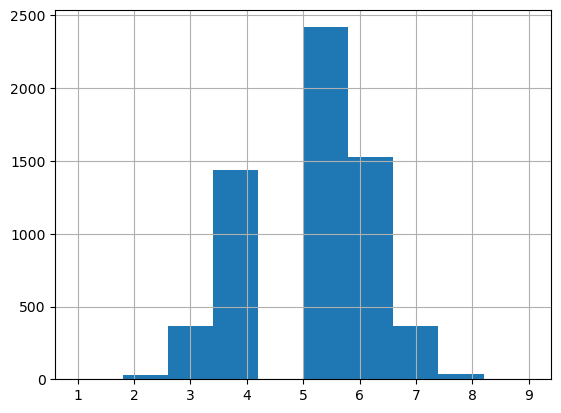

In [19]:
mba['work_exp'].hist(bins=10)

C:\Users\hiras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hiras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


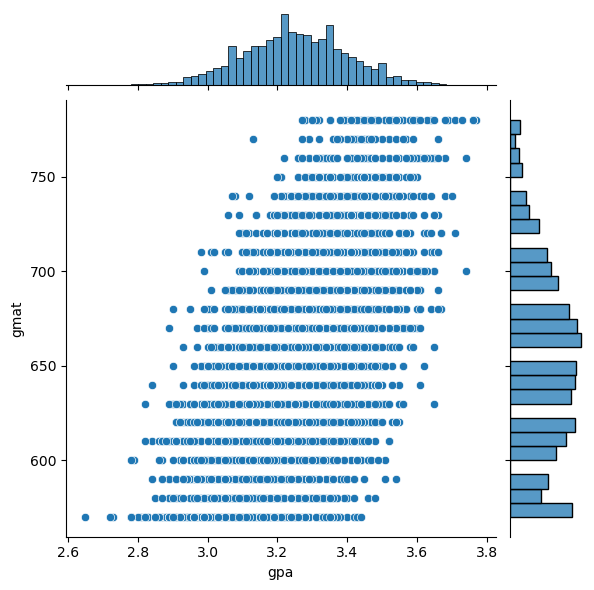

In [21]:
sns.jointplot(x='gpa', y='gmat',data=mba)

In [23]:
mba.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Reject
2,3,Female,True,3.30,Business,International,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Reject
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Reject


C:\Users\hiras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hiras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hiras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hiras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

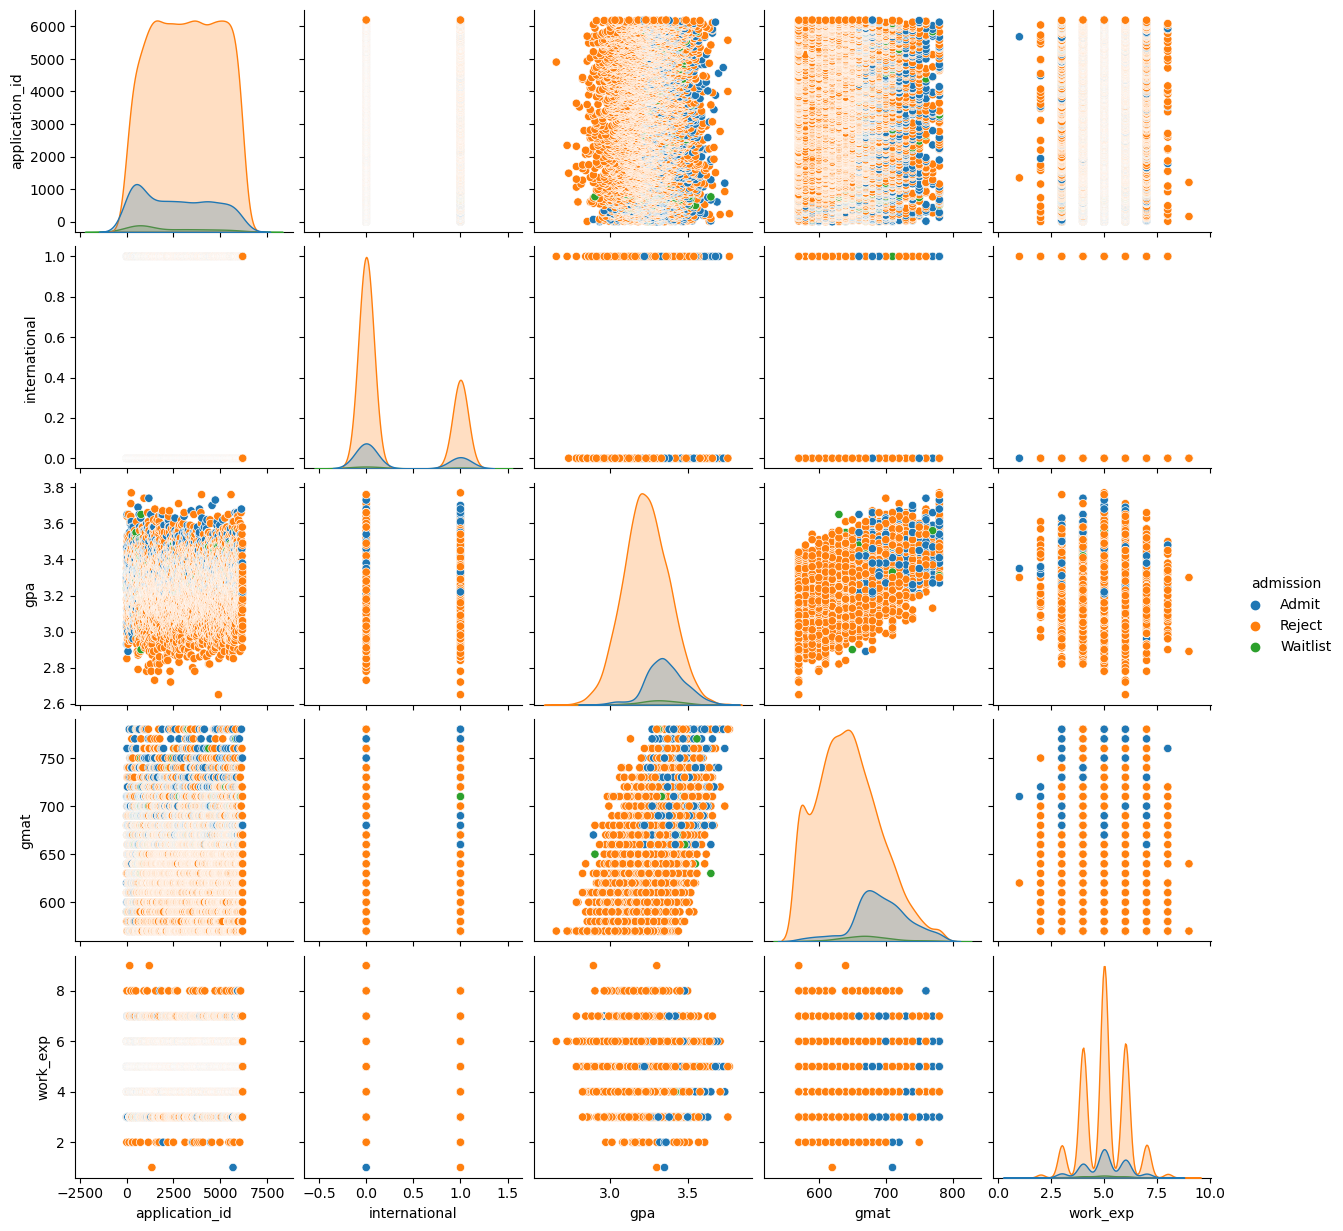

In [25]:
sns.pairplot(mba, hue='admission')

C:\Users\hiras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='work_exp', ylabel='Count'>

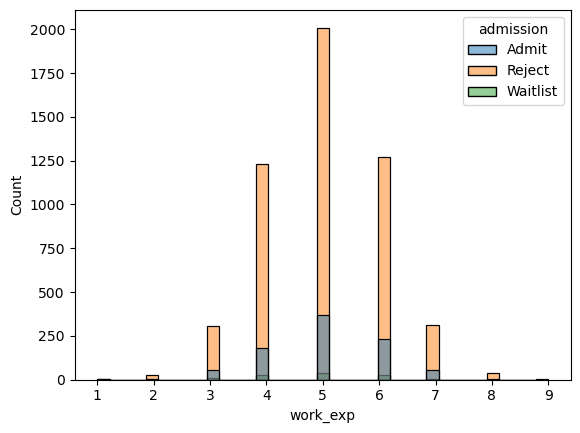

In [27]:
sns.histplot(data=mba, x='work_exp', hue='admission')

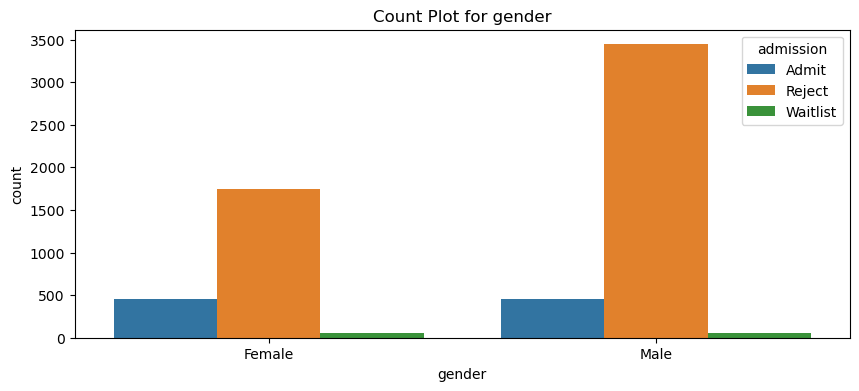

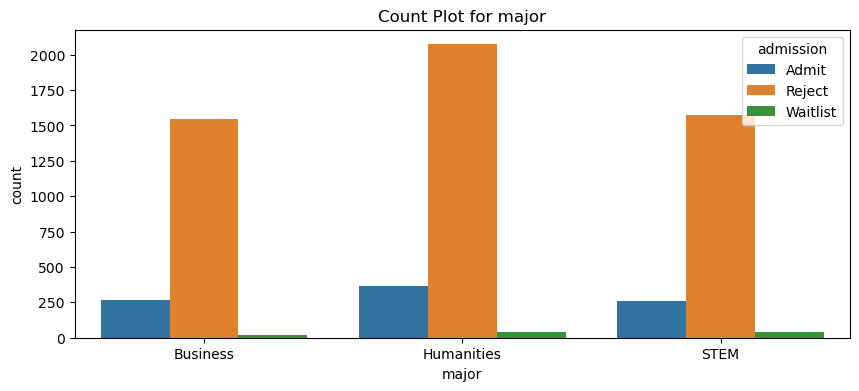

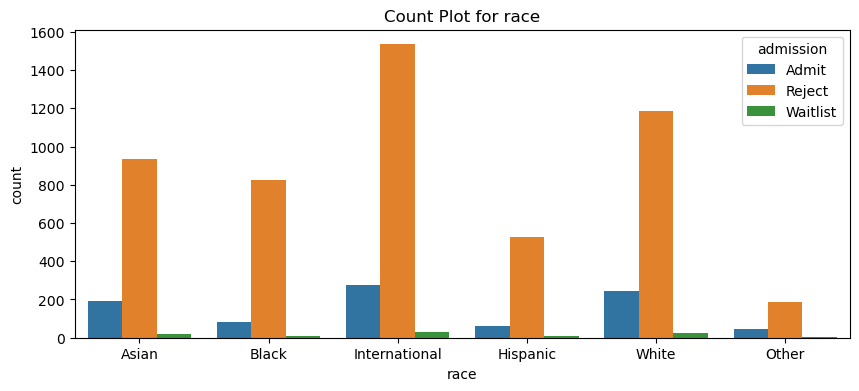

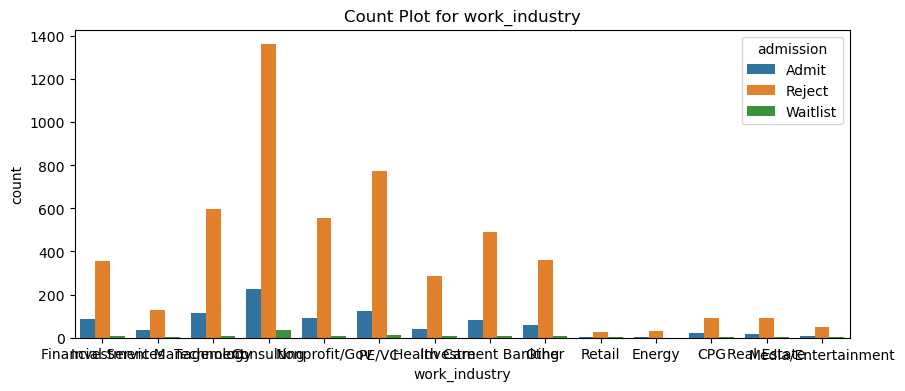

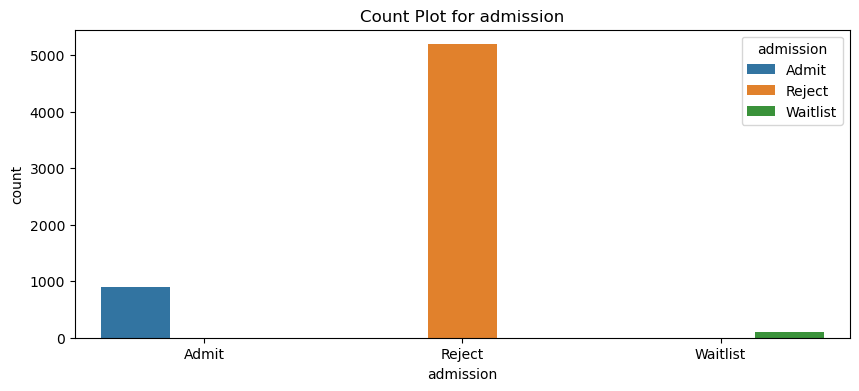

In [29]:
for cols in mba.select_dtypes('object').columns:
    plt.figure(figsize=(10,4))
    sns.countplot(data=mba, x=cols, hue='admission')
    plt.title(f"Count Plot for {cols}")
    plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder

In [53]:
le = LabelEncoder()
for cols in mba.select_dtypes(include=['object']).columns:
    mba[cols]=le.fit_transform(mba[cols])

In [55]:
X = mba.drop('admission', axis=1)
y = mba['admission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
y=le.fit_transform(y)

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [61]:
models = {
    'Linear_Regression':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor(),
    'XGB':XGBRegressor(),
    'SVM':SVC()
}

In [63]:
results = {'Model': [], 'Accuracy': [], 'Precision' : [], 'Recall': [], 'F1-Score': []}

for i in models:
    obj = models[i]
    obj.fit(X_train, y_train)
    obj_pred = obj.predict(X_test)

    accuracy = accuracy_score(y_test, obj_pred>0.5)
    precision = precision_score(y_test, obj_pred>0.5,average='weighted')
    recall = recall_score(y_test, obj_pred>0.5,average='weighted')
    f1 = f1_score(y_test, obj_pred>0.5,average='weighted')

    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

    results_df = pd.DataFrame(results)

    print(results_df)

C:\Users\hiras\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hiras\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hiras\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.820334   0.753933  0.820334  0.741394
               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.820334   0.753933  0.820334  0.741394
1                KNN  0.812265   0.750519  0.812265  0.767241
               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.820334   0.753933  0.820334  0.741394
1                KNN  0.812265   0.750519  0.812265  0.767241
2       DecisionTree  0.819258   0.797450  0.819258  0.807961


C:\Users\hiras\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hiras\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.820334   0.753933  0.820334  0.741394
1                KNN  0.812265   0.750519  0.812265  0.767241
2       DecisionTree  0.819258   0.797450  0.819258  0.807961
3       RandomForest  0.833782   0.793035  0.833782  0.798847
               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.820334   0.753933  0.820334  0.741394
1                KNN  0.812265   0.750519  0.812265  0.767241
2       DecisionTree  0.819258   0.797450  0.819258  0.807961
3       RandomForest  0.833782   0.793035  0.833782  0.798847
4                XGB  0.827864   0.789136  0.827864  0.801877
               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.820334   0.753933  0.820334  0.741394
1                KNN  0.812265   0.750519  0.812265  0.767241
2       DecisionTree  0.819258   0.797450  0.819258  0.807961
3       RandomForest  0.833782   0.793035  0.833782  0.798847
4       

C:\Users\hiras\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
